<a href="https://colab.research.google.com/github/AhmadFirmanto/Portfolio/blob/main/sales_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIbrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data

In [2]:
# red data

from google.colab import drive
drive.mount('/content/gdrive') 


Mounted at /content/gdrive


In [4]:
drive = ('/content/gdrive/MyDrive/studi kasus - sale game/Games Sales - Games (1).csv') 

print(drive)
df = pd.read_csv(drive)
df.head(2)


/content/gdrive/MyDrive/studi kasus - sale game/Games Sales - Games (1).csv


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


# clining data

In [7]:
# merubah format tanggal 

df['Release']=pd.to_datetime(df['Release'])
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB
None


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios


In [8]:
# cek data duplikat

df[df.duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [9]:
# menghapus data duplikat

df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


#Studi kasus Revou mini course

In [10]:
# game rilis paling lama

old_games = df[['Name','Release']].sort_values('Release').head()
print(old_games)

                                       Name    Release
133                                 Hydlide 1984-12-01
34   Where in the World Is Carmen Sandiego? 1985-06-01
88                     International Karate 1985-11-01
162                                  Tetris 1988-01-01
22                             Last Ninja 2 1988-08-01


In [12]:
# game terbaru

new_games = df[['Name','Release']].sort_values('Release', ascending = False).head()
print(new_games) 

                   Name    Release
20              Valheim 2021-02-01
27       Cyberpunk 2077 2020-12-01
110  Crusader Kings III 2020-09-01
10            Fall Guys 2020-08-01
139             Mordhau 2019-04-01


In [13]:
# penerbit game terbanyak

agg_publis = df.groupby('Publisher', as_index=False)['Name'].nunique()
agg_publis.sort_values('Name', ascending=False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


In [14]:

plt.rcParams["figure.figsize"] = (18,5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


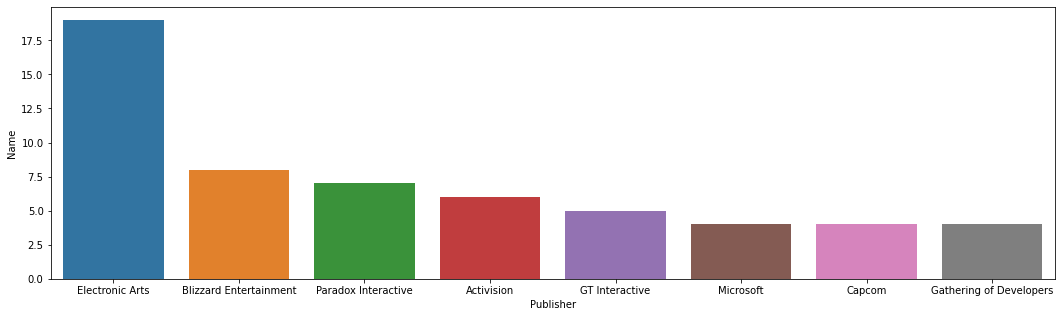

In [ ]:
# bar cahart

sns.barplot('Publisher', 'Name', data = agg_publis.sort_values('Name', ascending=False).head(8))

In [15]:
df.columns


Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [16]:
# developer terbanyak

agg_dev = df.groupby('Developer', as_index=False)['Name'].nunique()
agg_dev.sort_values('Name', ascending=False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


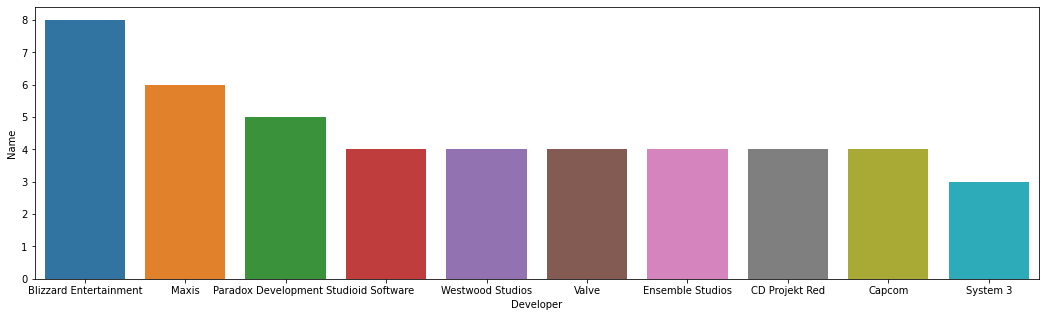

In [17]:
# visual developer

sns.barplot('Developer', 'Name', data = agg_dev.sort_values('Name', ascending=False).head(10))

In [18]:
# seris is the most sales

agg_series = df.groupby('Series', as_index=False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
agg_series.sort_values('Sales', ascending=False)

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
...,...,...,...
60,RoboCop,1.0,1
46,Microsoft Flight Simulator,1.0,1
58,Railroad Tycoon,1.0,1
56,Psychonauts,1.0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


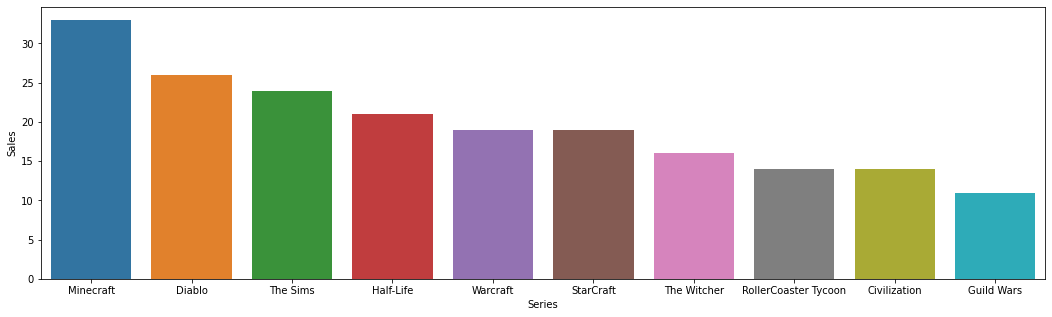

In [19]:
sns.barplot('Series', 'Sales', data = agg_series.sort_values('Sales', ascending=False).head(10))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


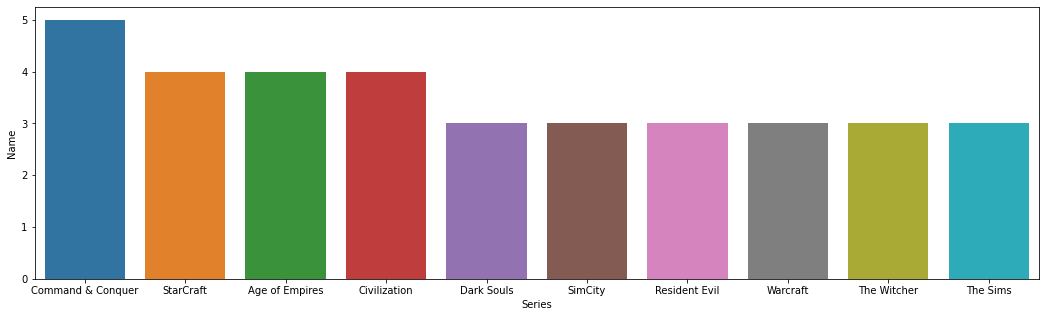

In [20]:
sns.barplot('Series', 'Name', data = agg_series.sort_values('Name', ascending=False).head(10))

In [22]:
df['Name'].unique()


array(["PlayerUnknown's Battlegrounds", 'Minecraft', 'Diablo III',
       "Garry's Mod", 'Terraria', 'World of Warcraft', 'Half-Life 2',
       'The Witcher 3: Wild Hunt', 'StarCraft', 'The Sims', 'Fall Guys',
       'RollerCoaster Tycoon 3', 'Half-Life', 'Rust', 'Civilization V',
       'The Sims 3', 'Euro Truck Simulator 2', 'Guild Wars',
       'StarCraft II: Wings of Liberty', 'The Sims 2', 'Valheim',
       'ARMA 3', 'Last Ninja 2', 'Cities: Skylines', 'Guild Wars 2',
       'SimCity 3000', 'The Forest', 'Cyberpunk 2077', 'DayZ',
       'Diablo II', 'Populous', 'RollerCoaster Tycoon', 'The Last Ninja',
       'Warhammer 40,000: Dawn of War\xa0(including expansions)',
       'Where in the World Is Carmen Sandiego?', 'Dark Souls',
       'Dark Souls III', 'Age of Empires', 'Civilization IV',
       'Command & Conquer', 'Command & Conquer: Red Alert', 'Crysis',
       'EverQuest', 'Life Is Strange', 'Theme Park',
       'Warcraft III: Reign of Chaos', 'Dark Souls II', 'Caesar II',
  

In [21]:
game_penjualan = df.groupby('Name', as_index=False)['Sales'].sum()
game_penjualan.sort_values('Sales', ascending=False)

,Name,Sales
106,PlayerUnknown's Battlegrounds,42.0
95,Minecraft,33.0
67,Garry's Mod,20.0
50,Diablo III,20.0
144,Terraria,17.2
...,...,...
41,Danganronpa: Trigger Happy Havoc,1.0
45,Daryl F. Gates' Police Quest: SWAT,1.0
47,Deer Hunter,1.0
104,Phantasmagoria,1.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


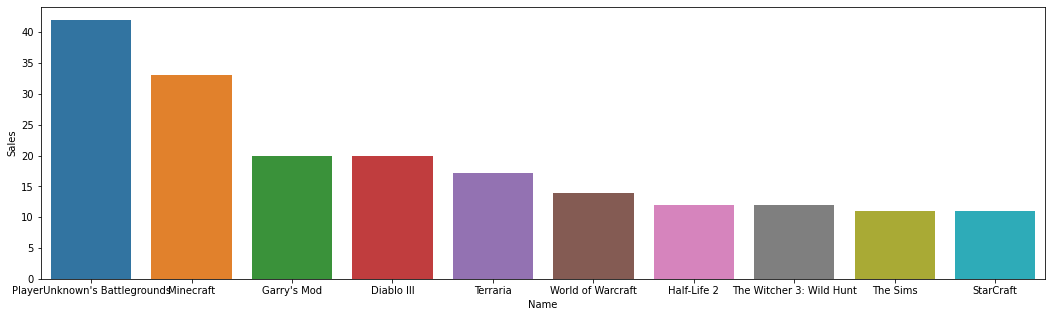

In [23]:
# game dengan penjualan terbanyak

sns.barplot('Name', 'Sales', data = game_penjualan.sort_values('Sales', ascending=False).head(10))